In [ ]:
!pip install seaborn

In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep  2 2021, 17:55:20) [MSC v.1916 64 bit (AMD64)]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[ OK ] xgboost version 1.3.3 is installed.
[ OK ] shap version 0.39.0 is installed.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt
%pylab inline
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy


In [3]:
fontsize=14
rcParams['font.size']=fontsize
rcParams['font.family']='sans-serif'
rcParams['axes.labelsize']=fontsize
rcParams['axes.titlesize']=fontsize
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=fontsize
rcParams['legend.fontsize']=fontsize
rcParams['figure.figsize']=(10,7.5)
rcParams['axes.grid']=True

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('data/train_V2.csv')
df.sample(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1936040,1580c3c1b99947,ab1707c2c61fe0,91a6f0da0d8c8d,0,0,100.00,1,0,0,92,0,0,0,0.000,1410,squad,28,27,1477,0,0.0,0,0.0,0,0,94.72,1,0,0.0370
321735,2ec4a221cf7daa,9b3a9be892c133,00cea312eb05c3,1,0,355.10,2,1,0,15,0,2,1,8.655,1821,squad-fpp,30,28,1463,0,902.2,0,0.0,0,0,1103.00,2,0,0.4483
3508067,7982bece8d0af7,4eaca964e59422,fddde336535371,0,1,92.63,0,0,1,70,0,0,0,0.000,1378,squad-fpp,29,27,1503,0,0.0,0,0.0,0,0,264.10,2,0,0.3214
857920,15a2b08ace3221,9fe3246ae66c6b,06c5ec862480e1,0,2,77.69,0,0,4,57,0,0,0,0.000,1777,squad-fpp,28,28,1478,1,0.0,0,0.0,0,0,680.30,7,0,0.5556
3390182,7d73108c0ddc73,b963f4395a1009,3612d9598eb78d,1,0,67.86,0,0,0,66,0,0,0,0.000,1852,squad-fpp,27,25,1477,0,0.0,0,0.0,0,0,443.50,6,0,0.3077
3370157,66fc4545e25ded,935052b4077bb9,15535f0f9d9e46,0,0,47.73,0,0,0,84,0,0,0,0.000,1305,squad-fpp,31,29,1493,0,0.0,0,0.0,0,0,264.50,1,0,0.1667
3654256,2ff892e9c8f23f,c5145b77a5fd3a,4d9f7bb96a7cdc,0,0,100.00,1,0,0,67,1092,0,0,0.000,1251,squad-fpp,29,28,-1,0,0.0,0,0.0,0,0,398.60,5,1501,0.3929
2051180,0ca05c30a4d1e8,e396d7cd655044,4855a18be6a1ab,0,4,176.10,1,1,5,33,0,1,1,167.600,1377,squad-fpp,27,26,1384,0,0.0,0,0.0,0,0,2414.00,5,0,0.7308
2978411,58e0f5af3360cb,a9255e5bf9fb58,c5e796e9e9067a,1,0,0.00,0,0,0,58,0,0,0,0.000,1850,duo-fpp,49,49,1506,0,6062.0,0,0.0,0,0,451.30,5,0,0.5625
279792,dd063cf6493152,2207dc1c4767db,c78ebb7d7c52f3,0,2,0.00,0,0,0,72,0,0,0,0.000,1974,duo,46,41,1483,0,0.0,0,0.0,0,0,186.20,4,0,0.1556


In [6]:
df.shape

(4446966, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [9]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.shape

(4446965, 29)

In [12]:
match_df = df.groupby('matchId').count()['Id']

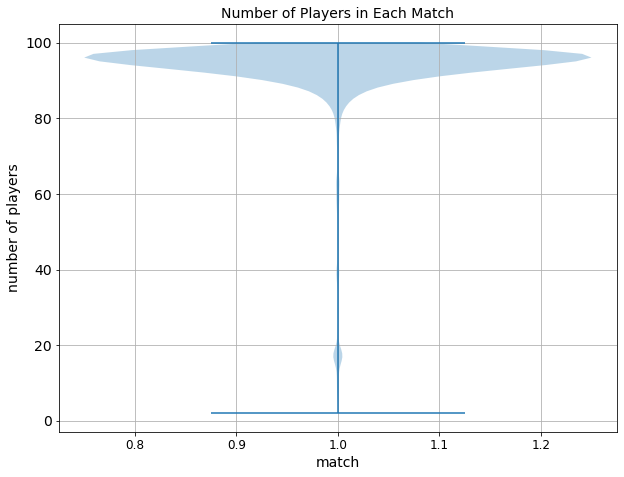

In [13]:
fig = plt.figure()
plt.violinplot(match_df)
plt.ylabel('number of players')
plt.xlabel('match')
plt.title('Number of Players in Each Match')
plt.show()
fig.savefig('figures/Number of Players in Each Match.jpg', dpi = 300)

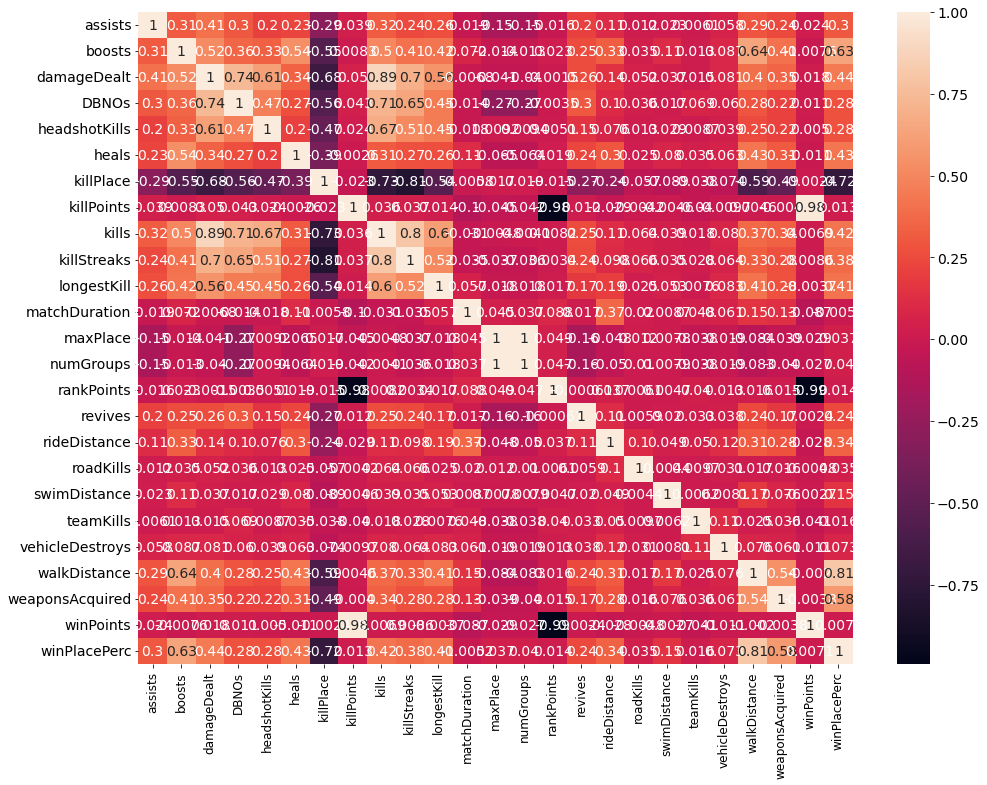

In [14]:
fig,ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(df.corr(), annot=True)
fig.savefig('figures/Correlation.jpg', dpi = 300)

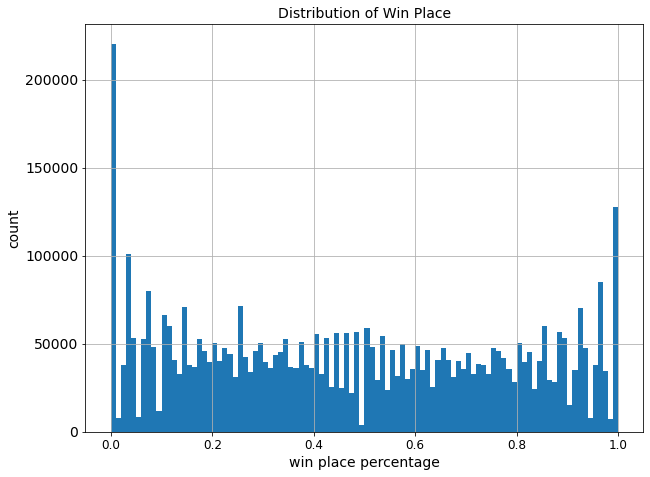

In [15]:
fig = plt.figure()
df['winPlacePerc'].plot.hist(bins=100)
plt.xlabel('win place percentage')
plt.ylabel('count')
plt.title('Distribution of Win Place')
plt.show()
fig.savefig('figures/Distribution of Win Place.jpg', dpi = 300)

In [ ]:
fig = plt.figure()
df.plot.scatter('killPlace','winPlacePerc',s=1,alpha=0.1)
plt.ylabel('win place percentage')
plt.xlabel('kill place')
plt.title('Distribution of Win Place vs. Kill Place')
plt.show()
fig.savefig('figures/Distribution of Win Place vs. Kill Place.jpg', dpi = 300)

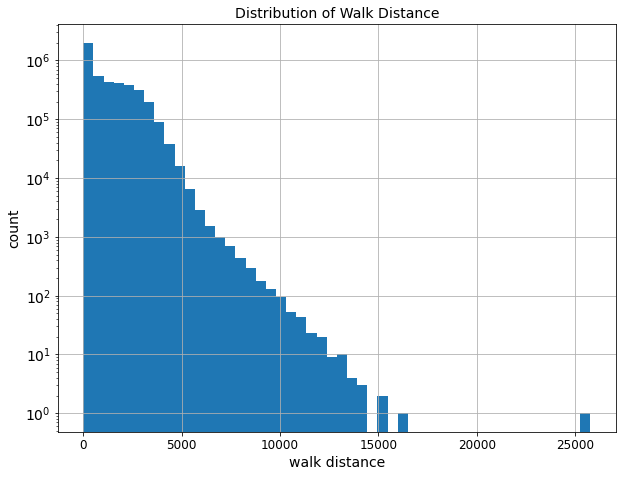

In [16]:
fig = plt.figure()
df['walkDistance'].plot.hist(bins=50, log=True)
plt.xlabel('walk distance')
plt.ylabel('count')
plt.title('Distribution of Walk Distance')
plt.show()
fig.savefig('figures/Distribution of Walk Distance.jpg', dpi = 300)

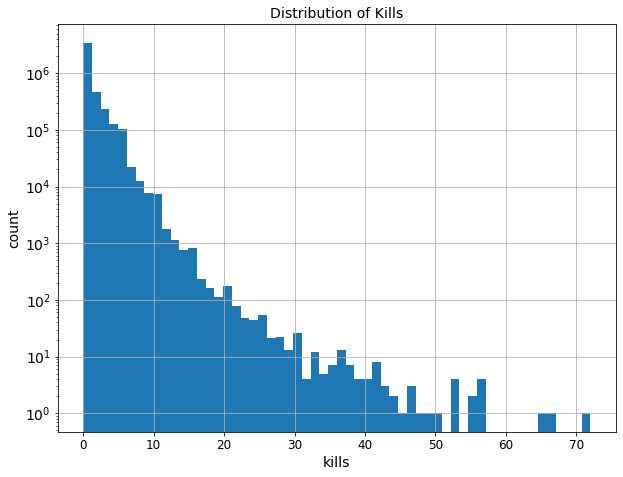

In [17]:
fig = plt.figure()
df['kills'].plot.hist(bins=df['kills'].nunique(), log=True)
plt.xlabel('kills')
plt.ylabel('count')
plt.title('Distribution of Kills')
plt.show()
fig.savefig('figures/Distribution of Kills.jpg', dpi = 300)

<Figure size 720x540 with 0 Axes>

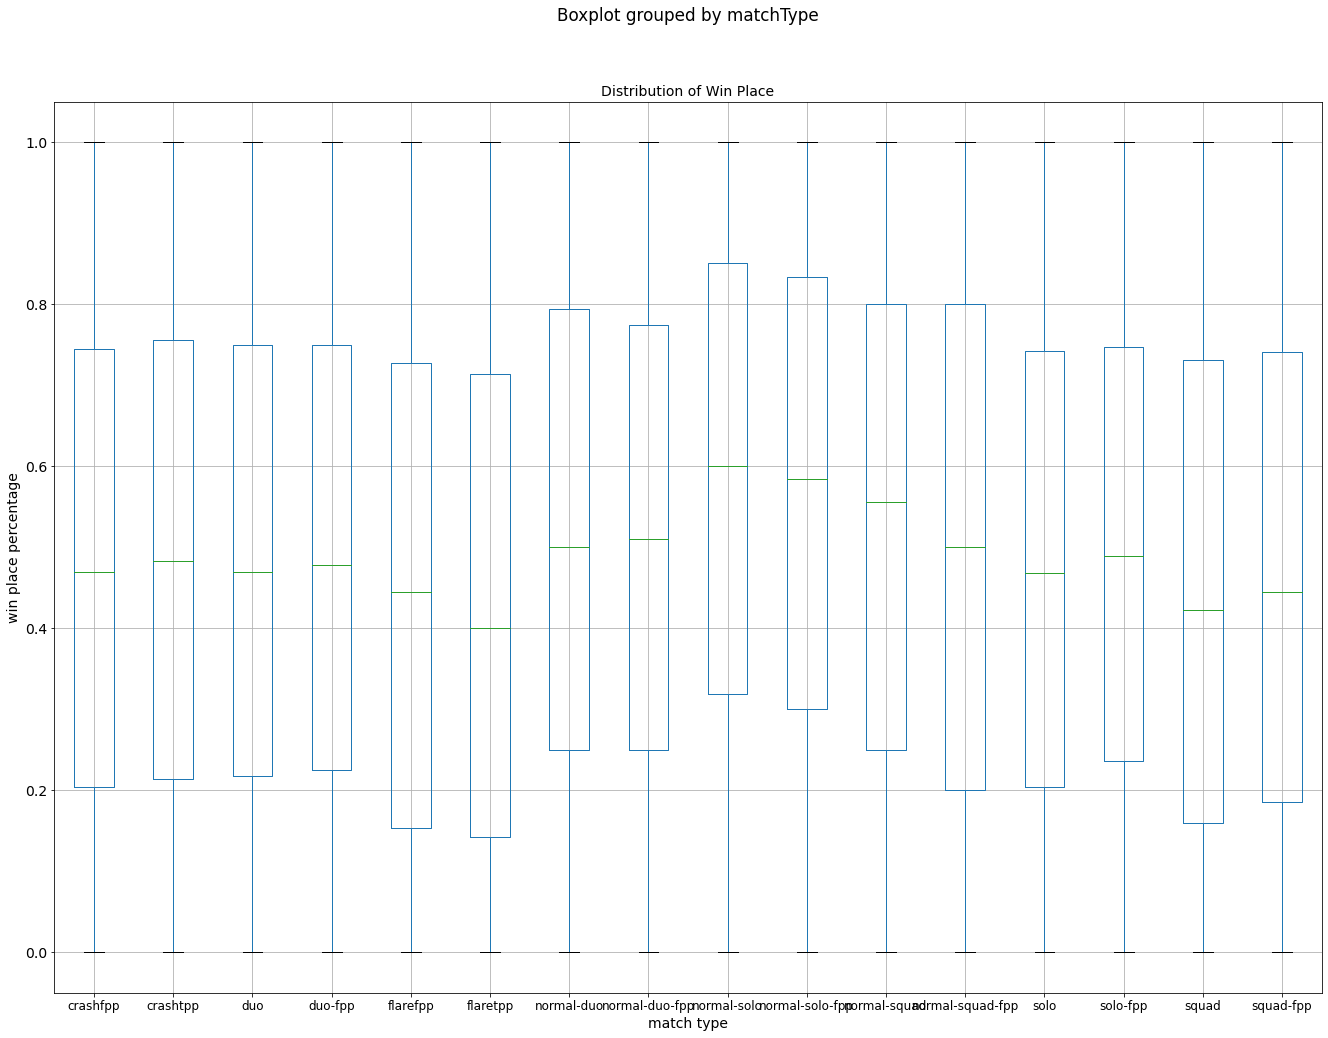

In [18]:
fig = plt.figure()
df[['winPlacePerc','matchType']].boxplot(by='matchType',figsize=(22,16.5))
plt.ylabel('win place percentage')
plt.xlabel('match type')
plt.title('Distribution of Win Place')
plt.show()
fig.savefig('figures/Distribution of Win Place by Match Type.jpg', dpi = 300)

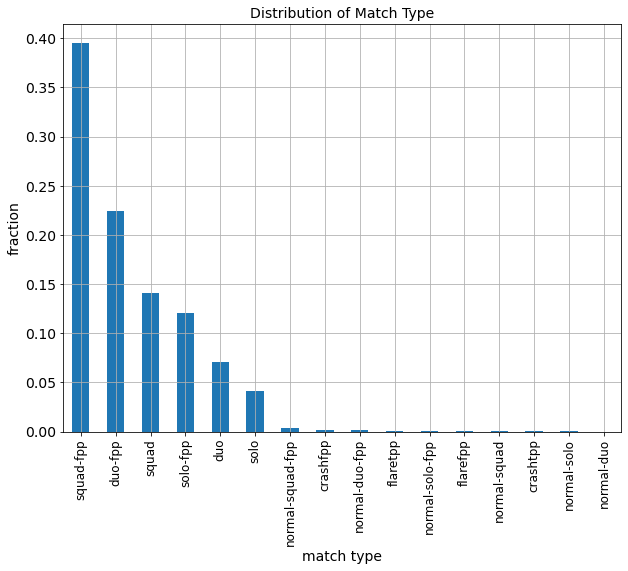

In [19]:
fig = plt.figure()
pd.value_counts(df['matchType'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.xlabel('match type')
plt.title('Distribution of Match Type')
plt.show()
fig.savefig('figures/Distribution of Match Type.jpg', dpi = 300)

In [ ]:
fig = plt.figure()
pd.plotting.scatter_matrix(df[['assists', 'boosts', 'killPlace', 'kills', 'winPlacePerc']], marker='o', s=1, alpha=0.1)
plt.show()
fig.savefig('figures/Scatter Matrix.jpg', dpi = 300)

In [20]:
n = len(pd.unique(df['Id']))
n

4446965

In [21]:
column_list = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 
               'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'revives', 'rideDistance', 
               'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 
               'winPlacePerc']

In [22]:
ndf = df[column_list]
ndf.sample(10)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3218039,0,0,95.94,0,0,0,61,0,0,0,0.000,1326,squad-fpp,29,0,0.0,0,0.00,0,0,374.90,4,0,0.3929
3302310,0,0,99.38,0,0,0,77,0,0,0,0.000,1221,squad,24,0,0.0,0,0.00,0,0,485.50,1,0,0.1739
515080,0,3,157.80,0,0,5,45,0,0,0,0.000,1862,duo-fpp,49,0,5582.0,0,41.66,0,0,1443.00,3,0,0.8333
745192,0,0,0.00,0,0,0,80,0,0,0,0.000,1296,solo-fpp,94,0,0.0,0,0.00,0,0,34.95,3,0,0.1183
1857670,0,0,125.80,1,0,0,34,0,1,1,14.890,1434,duo-fpp,44,0,0.0,0,0.00,0,0,208.70,5,0,0.2791
2280036,0,0,46.53,0,0,0,53,990,0,0,0.000,1780,duo-fpp,46,0,0.0,0,0.00,0,0,105.30,2,1490,0.5111
2590094,0,0,182.00,1,1,0,15,0,2,2,5.012,1869,squad,27,1,0.0,0,0.00,0,0,271.00,4,0,0.2308
3096183,0,0,34.80,1,0,0,94,1300,0,0,0.000,1286,squad-fpp,28,0,0.0,0,0.00,0,0,53.01,2,1443,0.0741
4179687,0,0,100.00,1,0,0,84,0,0,0,0.000,1270,squad-fpp,27,0,0.0,0,0.00,0,0,250.00,1,0,0.0769
2125940,0,0,100.00,1,0,0,44,0,1,1,17.630,1382,squad-fpp,27,1,0.0,0,0.00,0,0,89.66,2,0,0.0769


In [23]:
ndf.shape

(4446965, 24)

In [24]:
def basic_split(X_in, y_t, train_size, val_size, test_size, random_seed):
    while True:
        try:
            train_size = float(train_size)
            val_size = float(val_size)
            test_size = float(test_size)
            if train_size+val_size+test_size == 1 or train_size+val_size+test_size == 0.6+0.3+0.1:
                break
            else:
                raise ValueError
        except ValueError:
            print('The sizes are not valid. Try again.')
            train_size = input('Train size: ')
            val_size = input('Val size: ')
            test_size = input('Test size: ')
    while True:
        try:
            r = int(random_seed)
            if float(random_seed) == r:
                random_seed = r
                break
            else:
                raise ValueError
        except ValueError:
            print('The random seed is not valid. Try again.')
            random_seed = input('Random seed: ')
    
    X_train, X_other, y_train, y_other = train_test_split(X_in,y_t,train_size=train_size,random_state=random_seed)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size=val_size/(val_size+test_size),random_state=random_seed)
    
    tr = int(len(X_in)*train_size)
    val = int((len(X_in)-tr)*val_size/(val_size+test_size))
    te = len(X_in)-tr-val
    
    try:
        if len(X_train)==tr and len(y_train)==tr and len(X_val)==val and len(y_val)==val and len(X_test)==te and len(y_test)==te:
            return X_train, y_train, X_val, y_val, X_test, y_test
        else:
            raise ValueError
    except ValueError:
        print('The output sizes are not what you want them to be.')

In [25]:
r_s = 11
tr_s = 0.98
va_s = 0.01
te_s = 0.01
X = ndf.loc[:, ndf.columns != 'winPlacePerc']
y = ndf['winPlacePerc']

In [26]:
df_set = basic_split(X, y, tr_s, va_s, te_s, r_s)
X_train = df_set[0]
X_val = df_set[2]
X_test = df_set[4]

In [27]:
print(X_train.shape)
print(X_val.shape)

(4358025, 23)
(44470, 23)


In [28]:
onehot_ftrs = ['matchType']
minmax_ftrs = ['killPlace', 'maxPlace']
std_ftrs = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPoints', 'kills', 'killStreaks', 
            'longestKill', 'matchDuration', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 
            'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

In [29]:
print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(4358025, 23)
(4358025, 38)
[[ 0.          0.          0.         ...  1.01635127  1.35895594
   1.23502004]
 [ 0.          0.          0.         ...  1.45741523  2.17281861
  -0.81987167]
 [ 0.          0.          0.         ... -0.70945936 -0.67570076
  -0.81987167]
 ...
 [ 0.          0.          0.         ...  1.19886049  1.35895594
   1.13903496]
 [ 0.          0.          1.         ...  2.66400401  0.54509326
  -0.81987167]
 [ 0.          0.          0.         ...  2.92593855  1.76588727
  -0.81987167]]
